## Training with increased $N_{data}$
(using the rescaled, smaller dataset)

In [1]:
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# setup general info on batch sizes and img sizes
batch_size = 32
img_height = 256
img_width = 256

In [3]:
# taken from tf tutorial, unknown what this does so far
AUTOTUNE = tf.data.AUTOTUNE

In [4]:
datadir = os.path.join('..', 'Data', 'cars-rescaled')

In [5]:
# generate training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    datadir,
    validation_split= 0.2, # let the program know what the validation split will be in order to choose the correct size of this training set as well
    subset="training", # here we denote that this set will be the *training* set.
    seed=123,
    image_size = (img_height, img_width), # rescale images automatically
    batch_size= batch_size
) 

# randomly shuffle your data.
train_ds_pref = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# automatic labelling with this object, based on dict names.
class_names = train_ds.class_names

Found 31638 files belonging to 5 classes.
Using 25311 files for training.


In [6]:
# generate validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    datadir,
    validation_split= 0.2,
    subset="validation", # here we denote that this set will be the *validation* set.
    seed=123, 
    image_size = (img_height, img_width),
    batch_size= batch_size
)

# function of this line is currently unknown.
val_ds_pref = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 31638 files belonging to 5 classes.
Using 6327 files for validation.


In [7]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

In [8]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [9]:
from tensorflow.keras.layers import Dropout

In [10]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation, # data augmentation as a very first step
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), # here we perform the dropout.
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [11]:
# compile the model
model.compile(optimizer='adam', # choose the optimizer
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss function is same as error function
              metrics=['accuracy']) # choose which metrics to keep track of during optimization

In [12]:
epochs = 45

In [13]:
checkpoint_filepath = os.path.join('..', 'models', 'checkpoints')
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    verbose=1, # no console output
    save_freq='epoch', # save after each epoch
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [14]:
history = model.fit(
  train_ds_pref,
  validation_data=val_ds_pref,
  epochs=epochs,
  callbacks=[model_checkpoint_callback]
)

Epoch 1/45
791/791 [==============================] - ETA: 0s - loss: 1.6143 - accuracy: 0.2236
Epoch 1: val_accuracy improved from -inf to 0.25367, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 600s 686ms/step - loss: 1.6143 - accuracy: 0.2236 - val_loss: 1.5816 - val_accuracy: 0.2537
Epoch 2/45
791/791 [==============================] - ETA: 0s - loss: 1.5800 - accuracy: 0.2573
Epoch 2: val_accuracy improved from 0.25367 to 0.27232, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 542s 685ms/step - loss: 1.5800 - accuracy: 0.2573 - val_loss: 1.5755 - val_accuracy: 0.2723
Epoch 3/45
791/791 [==============================] - ETA: 0s - loss: 1.5576 - accuracy: 0.2849
Epoch 3: val_accuracy improved from 0.27232 to 0.29714, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 541s 684ms/step - loss: 1.5576 - accuracy: 0.2849 - val_loss: 1.5525 - val_accuracy: 0.2971
Epoch 4/45
791/791 [==============================] - ETA: 0s - loss: 1.5119 - accuracy: 0.3242
Epoch 4: val_accuracy improved from 0.29714 to 0.36289, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 564s 713ms/step - loss: 1.5119 - accuracy: 0.3242 - val_loss: 1.4814 - val_accuracy: 0.3629
Epoch 5/45
791/791 [==============================] - ETA: 0s - loss: 1.4541 - accuracy: 0.3683
Epoch 5: val_accuracy improved from 0.36289 to 0.36305, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 595s 752ms/step - loss: 1.4541 - accuracy: 0.3683 - val_loss: 1.5039 - val_accuracy: 0.3630
Epoch 6/45
791/791 [==============================] - ETA: 0s - loss: 1.3847 - accuracy: 0.4109
Epoch 6: val_accuracy improved from 0.36305 to 0.41900, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 599s 758ms/step - loss: 1.3847 - accuracy: 0.4109 - val_loss: 1.3957 - val_accuracy: 0.4190
Epoch 7/45
791/791 [==============================] - ETA: 0s - loss: 1.3261 - accuracy: 0.4417
Epoch 7: val_accuracy improved from 0.41900 to 0.44065, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 608s 768ms/step - loss: 1.3261 - accuracy: 0.4417 - val_loss: 1.3382 - val_accuracy: 0.4407
Epoch 8/45
791/791 [==============================] - ETA: 0s - loss: 1.2758 - accuracy: 0.4653
Epoch 8: val_accuracy improved from 0.44065 to 0.46973, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 630s 796ms/step - loss: 1.2758 - accuracy: 0.4653 - val_loss: 1.2861 - val_accuracy: 0.4697
Epoch 9/45
791/791 [==============================] - ETA: 0s - loss: 1.2328 - accuracy: 0.4912
Epoch 9: val_accuracy improved from 0.46973 to 0.48443, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 617s 780ms/step - loss: 1.2328 - accuracy: 0.4912 - val_loss: 1.2651 - val_accuracy: 0.4844
Epoch 10/45
791/791 [==============================] - ETA: 0s - loss: 1.1915 - accuracy: 0.5163
Epoch 10: val_accuracy improved from 0.48443 to 0.50308, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 620s 783ms/step - loss: 1.1915 - accuracy: 0.5163 - val_loss: 1.2106 - val_accuracy: 0.5031
Epoch 11/45
791/791 [==============================] - ETA: 0s - loss: 1.1605 - accuracy: 0.5274
Epoch 11: val_accuracy improved from 0.50308 to 0.50972, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 669s 846ms/step - loss: 1.1605 - accuracy: 0.5274 - val_loss: 1.2260 - val_accuracy: 0.5097
Epoch 12/45
791/791 [==============================] - ETA: 0s - loss: 1.1248 - accuracy: 0.5445
Epoch 12: val_accuracy improved from 0.50972 to 0.51636, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 660s 834ms/step - loss: 1.1248 - accuracy: 0.5445 - val_loss: 1.2343 - val_accuracy: 0.5164
Epoch 13/45
791/791 [==============================] - ETA: 0s - loss: 1.0973 - accuracy: 0.5612
Epoch 13: val_accuracy improved from 0.51636 to 0.54576, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 640s 809ms/step - loss: 1.0973 - accuracy: 0.5612 - val_loss: 1.1623 - val_accuracy: 0.5458
Epoch 14/45
791/791 [==============================] - ETA: 0s - loss: 1.0716 - accuracy: 0.5712
Epoch 14: val_accuracy improved from 0.54576 to 0.55666, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 676s 855ms/step - loss: 1.0716 - accuracy: 0.5712 - val_loss: 1.1234 - val_accuracy: 0.5567
Epoch 15/45
791/791 [==============================] - ETA: 0s - loss: 1.0466 - accuracy: 0.5838
Epoch 15: val_accuracy did not improve from 0.55666
791/791 [==============================] - 650s 822ms/step - loss: 1.0466 - accuracy: 0.5838 - val_loss: 1.1337 - val_accuracy: 0.5486
Epoch 16/45
791/791 [==============================] - ETA: 0s - loss: 1.0244 - accuracy: 0.5936
Epoch 16: val_accuracy improved from 0.55666 to 0.56393, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 659s 833ms/step - loss: 1.0244 - accuracy: 0.5936 - val_loss: 1.1360 - val_accuracy: 0.5639
Epoch 17/45
791/791 [==============================] - ETA: 0s - loss: 1.0048 - accuracy: 0.6015
Epoch 17: val_accuracy improved from 0.56393 to 0.56456, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 658s 833ms/step - loss: 1.0048 - accuracy: 0.6015 - val_loss: 1.1283 - val_accuracy: 0.5646
Epoch 18/45
791/791 [==============================] - ETA: 0s - loss: 0.9876 - accuracy: 0.6087
Epoch 18: val_accuracy improved from 0.56456 to 0.58985, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 719s 910ms/step - loss: 0.9876 - accuracy: 0.6087 - val_loss: 1.0690 - val_accuracy: 0.5899
Epoch 19/45
791/791 [==============================] - ETA: 0s - loss: 0.9666 - accuracy: 0.6170
Epoch 19: val_accuracy improved from 0.58985 to 0.59128, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 656s 829ms/step - loss: 0.9666 - accuracy: 0.6170 - val_loss: 1.0532 - val_accuracy: 0.5913
Epoch 20/45
791/791 [==============================] - ETA: 0s - loss: 0.9498 - accuracy: 0.6260
Epoch 20: val_accuracy improved from 0.59128 to 0.60139, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 672s 850ms/step - loss: 0.9498 - accuracy: 0.6260 - val_loss: 1.0665 - val_accuracy: 0.6014
Epoch 21/45
791/791 [==============================] - ETA: 0s - loss: 0.9395 - accuracy: 0.6320
Epoch 21: val_accuracy did not improve from 0.60139
791/791 [==============================] - 700s 885ms/step - loss: 0.9395 - accuracy: 0.6320 - val_loss: 1.1056 - val_accuracy: 0.5845
Epoch 22/45
791/791 [==============================] - ETA: 0s - loss: 0.9285 - accuracy: 0.6338
Epoch 22: val_accuracy did not improve from 0.60139
791/791 [==============================] - 671s 849ms/step - loss: 0.9285 - accuracy: 0.6338 - val_loss: 1.1532 - val_accuracy: 0.5794
Epoch 23/45
791/791 [==============================] - ETA: 0s - loss: 0.9045 - accuracy: 0.6417
Epoch 23: val_accuracy did not improve from 0.60139
791/791 [==============================] - 686s 868ms/step - loss: 0.9045 - accuracy: 0.6417 - val_loss: 1.1933 - val_accuracy: 0.5635
Epoch 24/45
7

INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 676s 855ms/step - loss: 0.8978 - accuracy: 0.6500 - val_loss: 1.0715 - val_accuracy: 0.6113
Epoch 25/45
791/791 [==============================] - ETA: 0s - loss: 0.8847 - accuracy: 0.6494
Epoch 25: val_accuracy improved from 0.61135 to 0.61625, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 684s 865ms/step - loss: 0.8847 - accuracy: 0.6494 - val_loss: 1.0454 - val_accuracy: 0.6162
Epoch 26/45
791/791 [==============================] - ETA: 0s - loss: 0.8718 - accuracy: 0.6610
Epoch 26: val_accuracy did not improve from 0.61625
791/791 [==============================] - 667s 844ms/step - loss: 0.8718 - accuracy: 0.6610 - val_loss: 1.0640 - val_accuracy: 0.6156
Epoch 27/45
791/791 [==============================] - ETA: 0s - loss: 0.8654 - accuracy: 0.6643
Epoch 27: val_accuracy improved from 0.61625 to 0.62036, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 674s 852ms/step - loss: 0.8654 - accuracy: 0.6643 - val_loss: 1.0554 - val_accuracy: 0.6204
Epoch 28/45
791/791 [==============================] - ETA: 0s - loss: 0.8464 - accuracy: 0.6722
Epoch 28: val_accuracy did not improve from 0.62036
791/791 [==============================] - 729s 922ms/step - loss: 0.8464 - accuracy: 0.6722 - val_loss: 1.1149 - val_accuracy: 0.6068
Epoch 29/45
791/791 [==============================] - ETA: 0s - loss: 0.8426 - accuracy: 0.6723
Epoch 29: val_accuracy did not improve from 0.62036
791/791 [==============================] - 710s 898ms/step - loss: 0.8426 - accuracy: 0.6723 - val_loss: 1.0783 - val_accuracy: 0.6118
Epoch 30/45
791/791 [==============================] - ETA: 0s - loss: 0.8345 - accuracy: 0.6748
Epoch 30: val_accuracy did not improve from 0.62036
791/791 [==============================] - 714s 903ms/step - loss: 0.8345 - accuracy: 0.6748 - val_loss: 1.1613 - val_accuracy: 0.5919
Epoch 31/45
7

INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 714s 903ms/step - loss: 0.8256 - accuracy: 0.6798 - val_loss: 1.0289 - val_accuracy: 0.6267
Epoch 32/45
791/791 [==============================] - ETA: 0s - loss: 0.8140 - accuracy: 0.6857
Epoch 32: val_accuracy improved from 0.62668 to 0.63632, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 711s 898ms/step - loss: 0.8140 - accuracy: 0.6857 - val_loss: 1.0101 - val_accuracy: 0.6363
Epoch 33/45
791/791 [==============================] - ETA: 0s - loss: 0.8051 - accuracy: 0.6874
Epoch 33: val_accuracy did not improve from 0.63632
791/791 [==============================] - 706s 892ms/step - loss: 0.8051 - accuracy: 0.6874 - val_loss: 1.0761 - val_accuracy: 0.6251
Epoch 34/45
791/791 [==============================] - ETA: 0s - loss: 0.7949 - accuracy: 0.6910
Epoch 34: val_accuracy did not improve from 0.63632
791/791 [==============================] - 692s 874ms/step - loss: 0.7949 - accuracy: 0.6910 - val_loss: 1.0653 - val_accuracy: 0.6278
Epoch 35/45
791/791 [==============================] - ETA: 0s - loss: 0.7776 - accuracy: 0.7019
Epoch 35: val_accuracy improved from 0.63632 to 0.63679, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 700s 885ms/step - loss: 0.7776 - accuracy: 0.7019 - val_loss: 1.0551 - val_accuracy: 0.6368
Epoch 36/45
791/791 [==============================] - ETA: 0s - loss: 0.7801 - accuracy: 0.7002
Epoch 36: val_accuracy improved from 0.63679 to 0.64723, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 672s 849ms/step - loss: 0.7801 - accuracy: 0.7002 - val_loss: 1.0100 - val_accuracy: 0.6472
Epoch 37/45
791/791 [==============================] - ETA: 0s - loss: 0.7663 - accuracy: 0.7065
Epoch 37: val_accuracy did not improve from 0.64723
791/791 [==============================] - 674s 852ms/step - loss: 0.7663 - accuracy: 0.7065 - val_loss: 1.1150 - val_accuracy: 0.6279
Epoch 38/45
791/791 [==============================] - ETA: 0s - loss: 0.7587 - accuracy: 0.7086
Epoch 38: val_accuracy did not improve from 0.64723
791/791 [==============================] - 666s 841ms/step - loss: 0.7587 - accuracy: 0.7086 - val_loss: 1.0348 - val_accuracy: 0.6401
Epoch 39/45
791/791 [==============================] - ETA: 0s - loss: 0.7563 - accuracy: 0.7077
Epoch 39: val_accuracy improved from 0.64723 to 0.65055, saving model to ..\models\checkpoints
INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 670s 847ms/step - loss: 0.7563 - accuracy: 0.7077 - val_loss: 1.0307 - val_accuracy: 0.6505
Epoch 40/45
791/791 [==============================] - ETA: 0s - loss: 0.7531 - accuracy: 0.7108
Epoch 40: val_accuracy did not improve from 0.65055
791/791 [==============================] - 671s 849ms/step - loss: 0.7531 - accuracy: 0.7108 - val_loss: 1.0972 - val_accuracy: 0.6357
Epoch 41/45
791/791 [==============================] - ETA: 0s - loss: 0.7378 - accuracy: 0.7218
Epoch 41: val_accuracy did not improve from 0.65055
791/791 [==============================] - 672s 850ms/step - loss: 0.7378 - accuracy: 0.7218 - val_loss: 1.0601 - val_accuracy: 0.6464
Epoch 42/45
791/791 [==============================] - ETA: 0s - loss: 0.7384 - accuracy: 0.7189
Epoch 42: val_accuracy did not improve from 0.65055
791/791 [==============================] - 662s 837ms/step - loss: 0.7384 - accuracy: 0.7189 - val_loss: 1.0316 - val_accuracy: 0.6468
Epoch 43/45
7

INFO:tensorflow:Assets written to: ..\models\checkpoints\assets


791/791 [==============================] - 676s 854ms/step - loss: 0.7246 - accuracy: 0.7244 - val_loss: 1.0342 - val_accuracy: 0.6577
Epoch 45/45
791/791 [==============================] - ETA: 0s - loss: 0.7180 - accuracy: 0.7269
Epoch 45: val_accuracy did not improve from 0.65766
791/791 [==============================] - 733s 926ms/step - loss: 0.7180 - accuracy: 0.7269 - val_loss: 1.0325 - val_accuracy: 0.6509


In [15]:
from tensorflow.keras.models import load_model

In [16]:
model.save(os.path.join('..', 'models','trained-rescaled_data.h5'))

c:\Users\emiel\anaconda3\envs\newbase\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

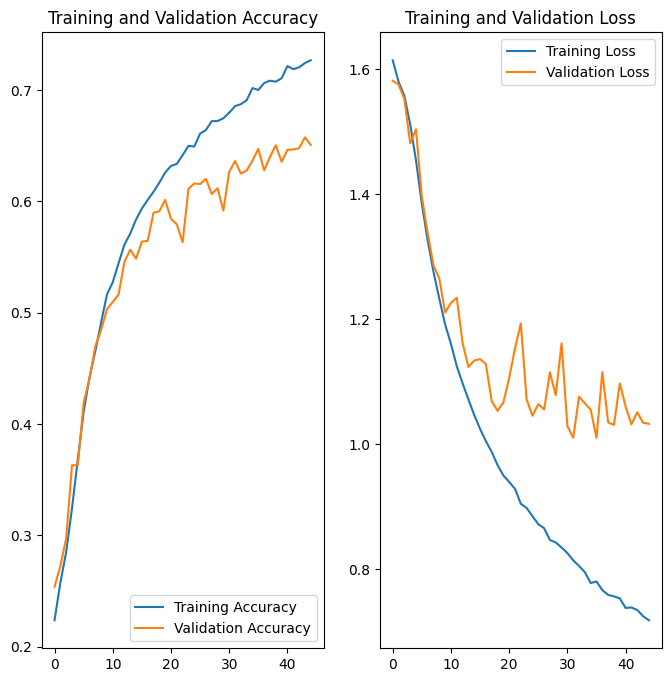

In [18]:
# plot the training results
plot_results(history)